# Chapter 4 - Exercise 3: Spam or ham
# Cho dữ liệu spam.csv

## Yêu cầu: đọc dữ liệu về, chuẩn hóa dữ liệu (nếu cần) và áp dụng thuật toán Naive Bayes để thực hiện việc dự đoán khả năng email là spam hay không dựa trên các thuộc tính v2

1. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được với tỷ lệ dữ liệu test là 0.2
2. Áp dụng thuật toán Naive Bayes => kết quả
3. Đánh giá mô hình
4. Ghi mô hình
5. Đọc mô hình vừa ghi => dự đoán kết quả cho câu 6
6. Cho dữ liệu Test: 
+ x_new = np.array(['Dear Ms. Phuong. I will come on time.', 'URGENT! We are trying to contact you. Today is the last day of sale. Discount up to 50%']) 
+ => sẽ là ham hay spam?


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows',10)

In [47]:
text = pd.read_csv('Data/spam.csv', encoding='latin')
text

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [49]:
x = text['v2']
x.isnull().sum()

0

In [51]:
y = text['v1']
y.value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

## <span style='color:yellow'> 1. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được với tỷ lệ dữ liệu test là 0.2
## <span style='color:yellow'> 2. Áp dụng thuật toán Naive Bayes => kết quả
## <span style='color:yellow'> 3. Đánh giá mô hình

In [58]:
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

GaussianNB accuracy score on train set: 0.9946152120260264
GaussianNB accuracy score on test set: 0.9874439461883409


Confusion matrix:
       ham  spam
ham   969     7
spam    7   132


Classification report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       976
        spam       0.95      0.95      0.95       139

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



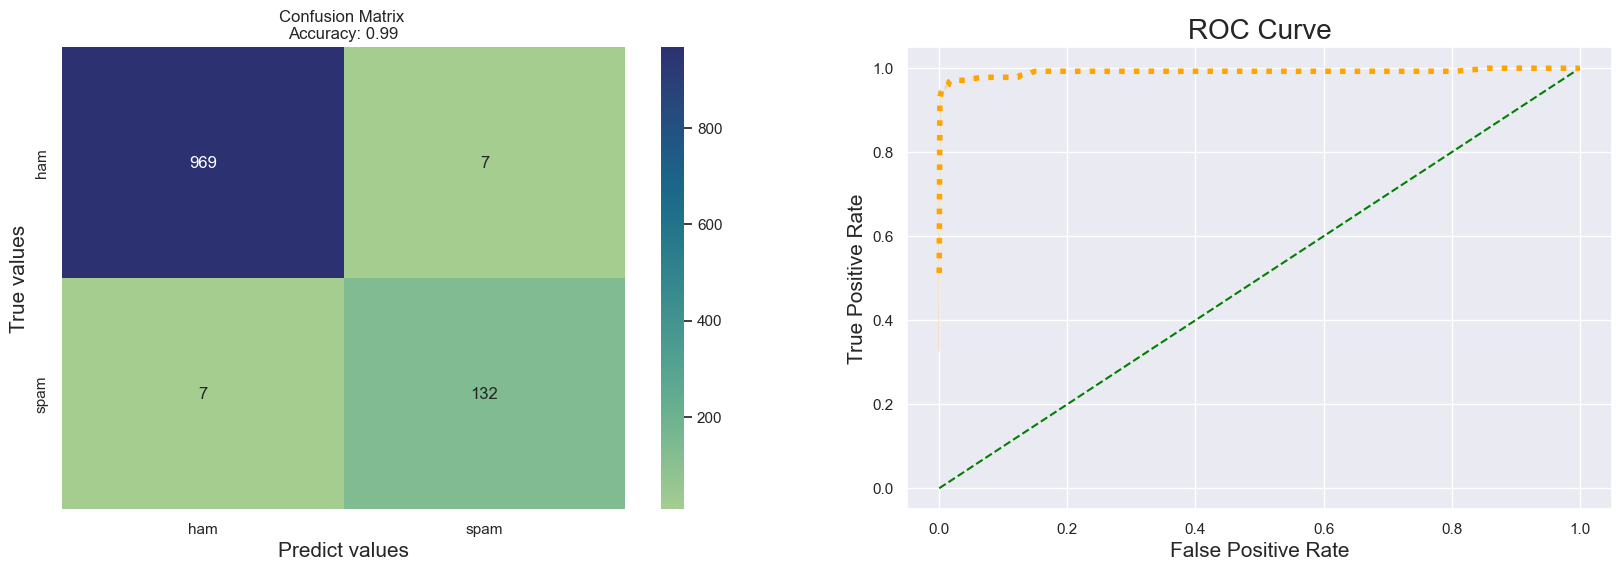

In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

nbMulti_pipe = Pipeline([
    ('CountVectorizer', CountVectorizer(stop_words='english')),
    ('Multinomial_Naive_Bayes', MultinomialNB())
])

nbMulti_pipe.fit(x_train, y_train)

y_test_pred = nbMulti_pipe.predict(x_test)
y_test_proba = nbMulti_pipe.predict_proba(x_test)

print(f'MultinomialNB accuracy score on train set: {accuracy_score(y_train, nbMulti_pipe.predict(x_train))}')
print(f'MultinomialNB accuracy score on test set: {accuracy_score(y_test, y_test_pred)}')
print()
labels = ['ham', 'spam']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')
print()
print(f'\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')

sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sbn.heatmap(cm_df, cmap="crest", annot=True, fmt=".0f")
plt.xlabel('Predict values', size=15)
plt.ylabel('True values', size=15)
plt.title(f'Confusion Matrix \nAccuracy: {accuracy_score(y_test, y_test_pred):.2f}')

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1], pos_label='spam')

plt.subplot(1,2,2)
sbn.lineplot(x=[0,1], y=[0,1], linestyle='--', color='green')
sbn.lineplot(x=fpr, y=tpr, linestyle='dotted', color='orange', linewidth=4)
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title('ROC Curve', size=20)

plt.show()

## <span style='color:yellow'> 5. Đọc mô hình vừa ghi => dự đoán kết quả cho câu 6


In [73]:
import pickle
pkl_filename = 'model_ex3_MultinomialNB.pkl'

file = open(pkl_filename, 'wb')
pickle.dump(nbMulti_pipe, file)
file.close()

In [77]:
file = open(pkl_filename, 'rb')
nbMulti_model = pickle.load(file)
file.close()

## <span style='color:yellow'> 6. Cho dữ liệu Test: 
+ x_new = np.array(['Dear Ms. Phuong. I will come on time.', 'URGENT! We are trying to contact you. Today is the last day of sale. Discount up to 50%']) 
+ => sẽ là ham hay spam?

In [109]:
x_new = pd.DataFrame(
    np.array(['Dear Ms. Phuong. I will come on time.', 'URGENT! We are trying to contact you. Today is the last day of sale. Discount up to 50%']),
    columns=['Text'])

y_new_pred = nbMulti_model.predict(x_new['Text'])

x_new['Predict'] = y_new_pred

x_new

,Text,Predict
0,Dear Ms. Phuong. I will come on time.,ham
1,URGENT! We are trying to contact you. Today is...,spam
